In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("/content/MN997409.1-4NY0T82X016-Alignment-HitTable.csv")
data

,MN997409.1,MN997409.1.1,100.000,29882,0,0.1,1,29882.1,1.1,29882.2,0.0,55182
0,MN997409.1,MT020881.1,99.990,29882,3,0,1,29882,1,29882,0.0,55166
1,MN997409.1,MT020880.1,99.990,29882,3,0,1,29882,1,29882,0.0,55166
2,MN997409.1,MN985325.1,99.990,29882,3,0,1,29882,1,29882,0.0,55166
3,MN997409.1,MN975262.1,99.990,29882,3,0,1,29882,1,29882,0.0,55166
4,MN997409.1,LC522974.1,99.993,29878,2,0,4,29881,1,29878,0.0,55164
...,...,...,...,...,...,...,...,...,...,...,...,...
257,MN997409.1,AY283796.1,79.325,1925,357,35,19,1923,3,1906,0.0,1312
258,MN997409.1,AY282752.2,82.304,17716,2948,169,3956,21577,3868,21490,0.0,15175
259,MN997409.1,AY282752.2,80.063,5417,988,68,22539,27910,22414,27783,0.0,3936
260,MN997409.1,AY282752.2,90.189,1641,142,12,28257,29882,28088,29724,0.0,2121


In [3]:
app = list(data.columns)


In [4]:
data = data.rename(columns={"MN997409.1": "query acc.ver", "MN997409.1.1": "subject acc.ver",
                            "100.000":"% identity","29882":"alignment length","0":"mismatches",
                            "0.1":"gap opens","1":"q. start","29882.1":"q. end","1.1":"s. start",
                           "29882.2 ":"s. end","0.0":"evalue","55182":"bit score"})

In [5]:
data.shape


(262, 12)

In [6]:
from sklearn.cluster import KMeans


In [7]:
data['subject acc.ver'] = data['subject acc.ver'].astype("category").cat.codes


In [8]:
data

,query acc.ver,subject acc.ver,% identity,alignment length,mismatches,gap opens,q. start,q. end,s. start,29882.2,evalue,bit score
0,MN997409.1,85,99.990,29882,3,0,1,29882,1,29882,0.0,55166
1,MN997409.1,84,99.990,29882,3,0,1,29882,1,29882,0.0,55166
2,MN997409.1,66,99.990,29882,3,0,1,29882,1,29882,0.0,55166
3,MN997409.1,65,99.990,29882,3,0,1,29882,1,29882,0.0,55166
4,MN997409.1,55,99.993,29878,2,0,4,29881,1,29878,0.0,55164
...,...,...,...,...,...,...,...,...,...,...,...,...
257,MN997409.1,3,79.325,1925,357,35,19,1923,3,1906,0.0,1312
258,MN997409.1,2,82.304,17716,2948,169,3956,21577,3868,21490,0.0,15175
259,MN997409.1,2,80.063,5417,988,68,22539,27910,22414,27783,0.0,3936
260,MN997409.1,2,90.189,1641,142,12,28257,29882,28088,29724,0.0,2121


In [9]:
X = data.iloc[:,1:].values


In [10]:
X


array([[8.5000e+01, 9.9990e+01, 2.9882e+04, ..., 2.9882e+04, 0.0000e+00,
        5.5166e+04],
       [8.4000e+01, 9.9990e+01, 2.9882e+04, ..., 2.9882e+04, 0.0000e+00,
        5.5166e+04],
       [6.6000e+01, 9.9990e+01, 2.9882e+04, ..., 2.9882e+04, 0.0000e+00,
        5.5166e+04],
       ...,
       [2.0000e+00, 8.0063e+01, 5.4170e+03, ..., 2.7783e+04, 0.0000e+00,
        3.9360e+03],
       [2.0000e+00, 9.0189e+01, 1.6410e+03, ..., 2.9724e+04, 0.0000e+00,
        2.1210e+03],
       [2.0000e+00, 7.9305e+01, 1.9280e+03, ..., 1.9070e+03, 0.0000e+00,
        1.3120e+03]])

In [11]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95, random_state=40)
X_reduced= pca.fit_transform(X)
X_reduced.shape

(262, 2)

In [12]:
from sklearn.cluster import MiniBatchKMeans
from sklearn.cluster import KMeans

In [13]:
from sklearn import metrics
from scipy.spatial.distance import cdist
from tqdm import tqdm

# run kmeans with many different k
distortions = []
K = range(2, 20)
for k in tqdm(K):
    k_means = KMeans(n_clusters=k, random_state=42)
    k_means.fit(X_reduced)
    distortions.append(sum(np.min(cdist(X_reduced, k_means.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])
    #print('Found distortion for {} clusters'.format(k))

100%|██████████| 18/18 [00:00<00:00, 67.69it/s]


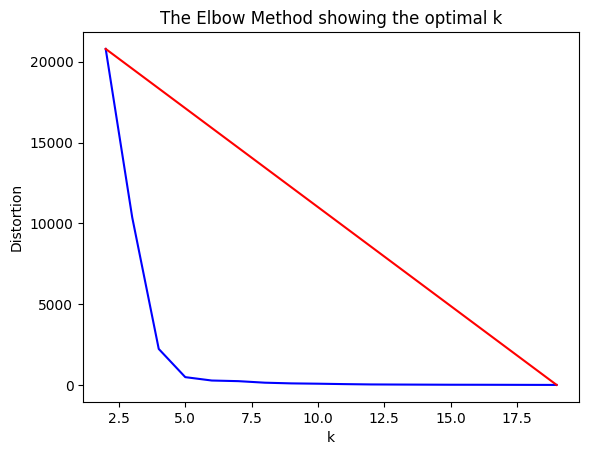

In [14]:
X_line = [K[0], K[-1]]
Y_line = [distortions[0], distortions[-1]]

# Plot the elbow
plt.plot(K, distortions, 'b-')
plt.plot(X_line, Y_line, 'r')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [15]:
k = 5
kmeans = KMeans(n_clusters=k, random_state=40)
y_pred = kmeans.fit_predict(X_reduced)
data['y'] = y_pred

In [16]:
from sklearn.manifold import TSNE

tsne = TSNE(verbose=1,init='pca', perplexity=200)
X_embedded = tsne.fit_transform(X)

[t-SNE] Computing 261 nearest neighbors...
[t-SNE] Indexed 262 samples in 0.001s...
[t-SNE] Computed neighbors for 262 samples in 0.020s...
[t-SNE] Computed conditional probabilities for sample 262 / 262
[t-SNE] Mean sigma: 39924.590099
[t-SNE] KL divergence after 250 iterations with early exaggeration: 32.667282
[t-SNE] KL divergence after 1000 iterations: 0.000709


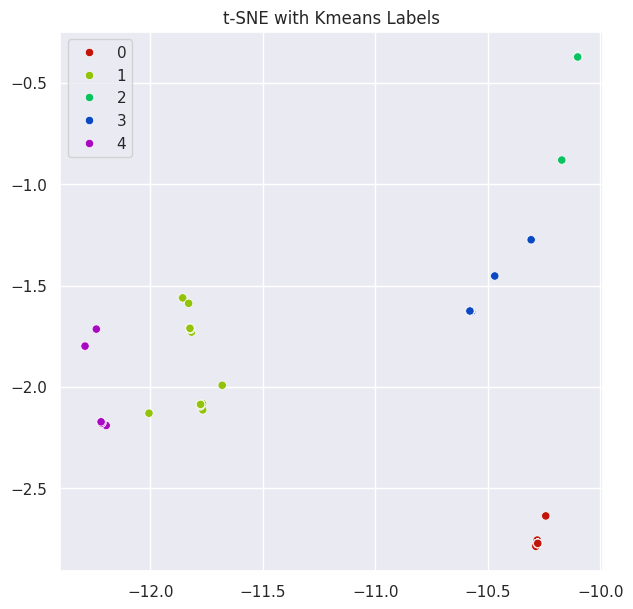

In [18]:
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns

# sns settings
sns.set(rc={'figure.figsize':(7,7)})

# colors
palette = sns.hls_palette(5, l=.4, s=.9)

# plot
sns.scatterplot(x=X_embedded[:,0], y=X_embedded[:,1], hue=y_pred, legend='full', palette=palette)
plt.title('t-SNE with Kmeans Labels')
#plt.savefig("improved_cluster_tsne.png")
plt.show()